# Random Forest

In [2]:
import pandas as pd 
import optuna 
import numpy as np
import matplotlib.pyplot as plt

import mlflow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

import os
import nbimporter
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

### Cremos primeramente un experimento con MLFLOW

In [4]:
MLFLOW_TRACKING_URI = os.getenv('MLFLOW_TRACKING_URI')

In [5]:
def get_or_create_experiment(experiment_name):
    """
    Retrieve the ID of an existing MLflow experiment or create a new one if it doesn't exist.
    """

    if experiment := mlflow.get_experiment_by_name(experiment_name):
        return experiment.experiment_id
    else:
        return mlflow.create_experiment(experiment_name)

In [6]:
experiment_id = get_or_create_experiment("random_forest_energy_demand_1")

Obtenemos los datos y tomamos una muestra para optimización de hiperparámetros

In [15]:
df = pd.read_csv('../data/processed/supervised_data_energy.csv')

Datos para optimización de hiperarámetros:

In [16]:
df_sample = df.sample(frac = 0.2)

In [17]:
X_study = df_sample[df_sample.columns[0:-1]]
y_study = df_sample[df_sample.columns[-1]]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_study, y_study, test_size=0.2, random_state=12)

Datos de entrenamiento y prueba:

In [18]:
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [19]:
run_name = "first_attempt"

Utilizando Optuna, definimos un estudio, declarando el espacio de hiperparámetros a explorar.

In [20]:
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 50, step = 2)
    max_depth = trial.suggest_int("max_depth", 5, 70, step = 2)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

    # Create and fit random forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_s, y_train_s)

    # Make predictions and calculate MAPE
    y_pred = model.predict(X_test_s)
    mape = mean_absolute_percentage_error(y_test_s, y_pred)

    # Return MAPE
    return mape

In [21]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [22]:
with mlflow.start_run(experiment_id=experiment_id, run_name=run_name, nested=True):
    # Initialize the Optuna study
    # Create study object
    study = optuna.create_study(direction="minimize")

    # Run optimization process
    study.optimize(objective, n_trials=150, show_progress_bar=True)

    mlflow.log_params(study.best_params)
    mlflow.log_metric("best_mape", study.best_value)

    # Log tags
    mlflow.set_tags(
        tags={
            "project": "Energy Demand Prediction",
            "optimizer_engine": "optuna",
            "model_family": "random_forest",
            "feature_set_version": 1,
        }
    )

[I 2024-05-24 11:07:29,730] A new study created in memory with name: no-name-82ff3c74-c08f-4fc5-a7c5-ea54eb4eb213


  0%|          | 0/150 [00:00<?, ?it/s]

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:08:30,676] Trial 0 finished with value: 0.013308510079244582 and parameters: {'n_estimators': 16, 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.013308510079244582.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:09:39,198] Trial 1 finished with value: 0.012051077069445807 and parameters: {'n_estimators': 30, 'max_depth': 63, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.012051077069445807.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:10:08,429] Trial 2 finished with value: 0.013740486850498343 and parameters: {'n_estimators': 32, 'max_depth': 35, 'min_samples_split': 9, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.012051077069445807.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:10:26,718] Trial 3 finished with value: 0.013863657874566443 and parameters: {'n_estimators': 20, 'max_depth': 69, 'min_samples_split': 3, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.012051077069445807.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:10:52,186] Trial 4 finished with value: 0.012251749895392213 and parameters: {'n_estimators': 20, 'max_depth': 67, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.012051077069445807.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:11:50,832] Trial 5 finished with value: 0.012041141061827835 and parameters: {'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 11, 'min_samples_leaf': 5}. Best is trial 5 with value: 0.012041141061827835.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:12:39,546] Trial 6 finished with value: 0.01196039382022583 and parameters: {'n_estimators': 36, 'max_depth': 51, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:13:08,698] Trial 7 finished with value: 0.0132480536942932 and parameters: {'n_estimators': 30, 'max_depth': 39, 'min_samples_split': 7, 'min_samples_leaf': 13}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:13:33,835] Trial 8 finished with value: 0.01258312014504803 and parameters: {'n_estimators': 22, 'max_depth': 63, 'min_samples_split': 16, 'min_samples_leaf': 8}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:13:58,900] Trial 9 finished with value: 0.012358103632653569 and parameters: {'n_estimators': 16, 'max_depth': 33, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:14:46,574] Trial 10 finished with value: 0.012592271958845352 and parameters: {'n_estimators': 46, 'max_depth': 49, 'min_samples_split': 16, 'min_samples_leaf': 9}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:15:18,087] Trial 11 finished with value: 0.017838834918358498 and parameters: {'n_estimators': 50, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 1}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:15:58,653] Trial 12 finished with value: 0.012588894399140746 and parameters: {'n_estimators': 40, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 5}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:16:42,393] Trial 13 finished with value: 0.012492538009290231 and parameters: {'n_estimators': 40, 'max_depth': 51, 'min_samples_split': 20, 'min_samples_leaf': 6}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:17:38,882] Trial 14 finished with value: 0.012039373924653048 and parameters: {'n_estimators': 40, 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:18:32,151] Trial 15 finished with value: 0.01199846925447399 and parameters: {'n_estimators': 36, 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:19:21,375] Trial 16 finished with value: 0.011976048854185177 and parameters: {'n_estimators': 34, 'max_depth': 49, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:19:55,013] Trial 17 finished with value: 0.01248190496917858 and parameters: {'n_estimators': 28, 'max_depth': 51, 'min_samples_split': 14, 'min_samples_leaf': 8}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:20:22,660] Trial 18 finished with value: 0.013396294696655842 and parameters: {'n_estimators': 26, 'max_depth': 43, 'min_samples_split': 7, 'min_samples_leaf': 14}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:20:37,810] Trial 19 finished with value: 0.012622667496808865 and parameters: {'n_estimators': 10, 'max_depth': 55, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:21:11,689] Trial 20 finished with value: 0.014053015880755134 and parameters: {'n_estimators': 36, 'max_depth': 57, 'min_samples_split': 2, 'min_samples_leaf': 20}. Best is trial 6 with value: 0.01196039382022583.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:22:03,738] Trial 21 finished with value: 0.011945155530266247 and parameters: {'n_estimators': 36, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:22:51,290] Trial 22 finished with value: 0.011963745418698156 and parameters: {'n_estimators': 34, 'max_depth': 31, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:23:40,361] Trial 23 finished with value: 0.012312696654604735 and parameters: {'n_estimators': 42, 'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:24:27,788] Trial 24 finished with value: 0.012746541647772428 and parameters: {'n_estimators': 44, 'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:25:17,347] Trial 25 finished with value: 0.012030199668706722 and parameters: {'n_estimators': 36, 'max_depth': 43, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:25:46,730] Trial 26 finished with value: 0.012340528317021562 and parameters: {'n_estimators': 24, 'max_depth': 29, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:26:34,527] Trial 27 finished with value: 0.011976048854185177 and parameters: {'n_estimators': 34, 'max_depth': 41, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:27:28,179] Trial 28 finished with value: 0.012008872824781209 and parameters: {'n_estimators': 38, 'max_depth': 35, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:28:14,196] Trial 29 finished with value: 0.013045021949960225 and parameters: {'n_estimators': 44, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:28:53,500] Trial 30 finished with value: 0.012235372900219713 and parameters: {'n_estimators': 32, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:29:39,074] Trial 31 finished with value: 0.011999677260968516 and parameters: {'n_estimators': 34, 'max_depth': 45, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:30:18,630] Trial 32 finished with value: 0.012008271607263402 and parameters: {'n_estimators': 28, 'max_depth': 57, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:31:05,407] Trial 33 finished with value: 0.011992558057914566 and parameters: {'n_estimators': 32, 'max_depth': 47, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:31:54,181] Trial 34 finished with value: 0.01205372291775378 and parameters: {'n_estimators': 38, 'max_depth': 33, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 21 with value: 0.011945155530266247.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:32:41,307] Trial 35 finished with value: 0.01193921717127557 and parameters: {'n_estimators': 30, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 35 with value: 0.01193921717127557.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:33:29,230] Trial 36 finished with value: 0.011940949659289804 and parameters: {'n_estimators': 30, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 35 with value: 0.01193921717127557.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:34:13,351] Trial 37 finished with value: 0.01196609641794189 and parameters: {'n_estimators': 28, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 35 with value: 0.01193921717127557.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:34:43,481] Trial 38 finished with value: 0.0134999250813532 and parameters: {'n_estimators': 30, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 35 with value: 0.01193921717127557.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:35:17,697] Trial 39 finished with value: 0.012107004174181736 and parameters: {'n_estimators': 26, 'max_depth': 37, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 35 with value: 0.01193921717127557.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:35:40,322] Trial 40 finished with value: 0.01231794076099381 and parameters: {'n_estimators': 18, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 35 with value: 0.01193921717127557.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:36:30,118] Trial 41 finished with value: 0.011921961637169147 and parameters: {'n_estimators': 32, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 41 with value: 0.011921961637169147.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:37:20,246] Trial 42 finished with value: 0.011927276488631509 and parameters: {'n_estimators': 32, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 41 with value: 0.011921961637169147.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:38:19,663] Trial 43 finished with value: 0.011973533306744057 and parameters: {'n_estimators': 32, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 41 with value: 0.011921961637169147.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:39:07,412] Trial 44 finished with value: 0.011961559640851513 and parameters: {'n_estimators': 30, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 41 with value: 0.011921961637169147.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:39:35,281] Trial 45 finished with value: 0.012293285382729061 and parameters: {'n_estimators': 22, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 41 with value: 0.011921961637169147.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:40:07,633] Trial 46 finished with value: 0.012140895276269756 and parameters: {'n_estimators': 24, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 41 with value: 0.011921961637169147.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:40:58,717] Trial 47 finished with value: 0.012014551960420875 and parameters: {'n_estimators': 30, 'max_depth': 31, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 41 with value: 0.011921961637169147.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:41:29,565] Trial 48 finished with value: 0.012438136662058575 and parameters: {'n_estimators': 26, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 41 with value: 0.011921961637169147.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:41:47,053] Trial 49 finished with value: 0.027716165963650553 and parameters: {'n_estimators': 38, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 41 with value: 0.011921961637169147.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:42:27,669] Trial 50 finished with value: 0.01210706974651345 and parameters: {'n_estimators': 32, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 41 with value: 0.011921961637169147.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:43:24,487] Trial 51 finished with value: 0.011885291639963168 and parameters: {'n_estimators': 36, 'max_depth': 63, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:44:25,053] Trial 52 finished with value: 0.011949099182510218 and parameters: {'n_estimators': 34, 'max_depth': 69, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:45:13,719] Trial 53 finished with value: 0.011973480854256958 and parameters: {'n_estimators': 36, 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:45:59,138] Trial 54 finished with value: 0.01196475553483938 and parameters: {'n_estimators': 28, 'max_depth': 63, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:46:45,060] Trial 55 finished with value: 0.011947478680214365 and parameters: {'n_estimators': 32, 'max_depth': 35, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:47:41,276] Trial 56 finished with value: 0.012153760912705923 and parameters: {'n_estimators': 40, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:48:35,501] Trial 57 finished with value: 0.011924689168290125 and parameters: {'n_estimators': 38, 'max_depth': 33, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:49:13,989] Trial 58 finished with value: 0.014044494609337283 and parameters: {'n_estimators': 42, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 20}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:50:16,161] Trial 59 finished with value: 0.012232673701616032 and parameters: {'n_estimators': 48, 'max_depth': 33, 'min_samples_split': 17, 'min_samples_leaf': 2}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:50:52,164] Trial 60 finished with value: 0.013870958915826915 and parameters: {'n_estimators': 38, 'max_depth': 63, 'min_samples_split': 5, 'min_samples_leaf': 18}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:51:43,590] Trial 61 finished with value: 0.011912793230805942 and parameters: {'n_estimators': 36, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:52:28,992] Trial 62 finished with value: 0.011999677260968516 and parameters: {'n_estimators': 34, 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:53:11,797] Trial 63 finished with value: 0.011968162771543164 and parameters: {'n_estimators': 30, 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:53:27,497] Trial 64 finished with value: 0.01260421463440778 and parameters: {'n_estimators': 10, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:54:25,898] Trial 65 finished with value: 0.011956452536038912 and parameters: {'n_estimators': 36, 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:55:09,498] Trial 66 finished with value: 0.012747697788552479 and parameters: {'n_estimators': 40, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:55:59,522] Trial 67 finished with value: 0.012186835505593917 and parameters: {'n_estimators': 42, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:56:33,697] Trial 68 finished with value: 0.014046192743761034 and parameters: {'n_estimators': 38, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:57:22,489] Trial 69 finished with value: 0.011947478680214365 and parameters: {'n_estimators': 32, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:58:03,259] Trial 70 finished with value: 0.012421301340517606 and parameters: {'n_estimators': 34, 'max_depth': 59, 'min_samples_split': 20, 'min_samples_leaf': 2}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:58:50,983] Trial 71 finished with value: 0.011912793230805942 and parameters: {'n_estimators': 36, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 11:59:38,671] Trial 72 finished with value: 0.011912793230805942 and parameters: {'n_estimators': 36, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:00:29,197] Trial 73 finished with value: 0.011924689168290125 and parameters: {'n_estimators': 38, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:01:22,478] Trial 74 finished with value: 0.011892191941379379 and parameters: {'n_estimators': 40, 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:02:17,818] Trial 75 finished with value: 0.011940804019543757 and parameters: {'n_estimators': 44, 'max_depth': 31, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:03:01,717] Trial 76 finished with value: 0.012309783023940864 and parameters: {'n_estimators': 40, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:03:51,598] Trial 77 finished with value: 0.012024532297635213 and parameters: {'n_estimators': 42, 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:04:42,392] Trial 78 finished with value: 0.011924689168290125 and parameters: {'n_estimators': 38, 'max_depth': 29, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:05:17,157] Trial 79 finished with value: 0.013055757806120168 and parameters: {'n_estimators': 36, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:06:02,763] Trial 80 finished with value: 0.012184805468232912 and parameters: {'n_estimators': 40, 'max_depth': 41, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:06:53,257] Trial 81 finished with value: 0.011924689168290125 and parameters: {'n_estimators': 38, 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:07:40,938] Trial 82 finished with value: 0.011981864325830618 and parameters: {'n_estimators': 38, 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:08:30,386] Trial 83 finished with value: 0.011912793230805942 and parameters: {'n_estimators': 36, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:09:25,284] Trial 84 finished with value: 0.011912793230805942 and parameters: {'n_estimators': 36, 'max_depth': 35, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:10:14,670] Trial 85 finished with value: 0.011973480854256958 and parameters: {'n_estimators': 36, 'max_depth': 37, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:11:14,552] Trial 86 finished with value: 0.012011015765486664 and parameters: {'n_estimators': 34, 'max_depth': 35, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:12:10,493] Trial 87 finished with value: 0.011912793230805942 and parameters: {'n_estimators': 36, 'max_depth': 37, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:12:57,240] Trial 88 finished with value: 0.012079248083272908 and parameters: {'n_estimators': 34, 'max_depth': 41, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:13:45,952] Trial 89 finished with value: 0.011973480854256958 and parameters: {'n_estimators': 36, 'max_depth': 39, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:14:03,727] Trial 90 finished with value: 0.012461279269698717 and parameters: {'n_estimators': 12, 'max_depth': 37, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:15:01,601] Trial 91 finished with value: 0.011885291639963168 and parameters: {'n_estimators': 36, 'max_depth': 33, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:16:06,107] Trial 92 finished with value: 0.01196621986996285 and parameters: {'n_estimators': 36, 'max_depth': 33, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:17:03,755] Trial 93 finished with value: 0.011885291639963168 and parameters: {'n_estimators': 36, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:17:52,747] Trial 94 finished with value: 0.012071342973991237 and parameters: {'n_estimators': 36, 'max_depth': 35, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 51 with value: 0.011885291639963168.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:18:56,907] Trial 95 finished with value: 0.011881060937487229 and parameters: {'n_estimators': 40, 'max_depth': 41, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 95 with value: 0.011881060937487229.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:20:08,050] Trial 96 finished with value: 0.011960304053586288 and parameters: {'n_estimators': 44, 'max_depth': 31, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 95 with value: 0.011881060937487229.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:21:23,734] Trial 97 finished with value: 0.011893401012469811 and parameters: {'n_estimators': 42, 'max_depth': 47, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 95 with value: 0.011881060937487229.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:22:41,968] Trial 98 finished with value: 0.01185572575296864 and parameters: {'n_estimators': 46, 'max_depth': 53, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:23:49,187] Trial 99 finished with value: 0.01185572575296864 and parameters: {'n_estimators': 46, 'max_depth': 53, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:24:55,696] Trial 100 finished with value: 0.01187280027848753 and parameters: {'n_estimators': 46, 'max_depth': 53, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:26:02,515] Trial 101 finished with value: 0.01186248942300084 and parameters: {'n_estimators': 48, 'max_depth': 53, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:27:12,086] Trial 102 finished with value: 0.011887259861711253 and parameters: {'n_estimators': 48, 'max_depth': 53, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:28:28,051] Trial 103 finished with value: 0.011932313614960905 and parameters: {'n_estimators': 46, 'max_depth': 53, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:29:39,853] Trial 104 finished with value: 0.011887259861711253 and parameters: {'n_estimators': 48, 'max_depth': 49, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:30:51,622] Trial 105 finished with value: 0.011891147374955141 and parameters: {'n_estimators': 48, 'max_depth': 53, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:32:03,714] Trial 106 finished with value: 0.011891147374955141 and parameters: {'n_estimators': 48, 'max_depth': 53, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:33:20,937] Trial 107 finished with value: 0.011863850729239261 and parameters: {'n_estimators': 50, 'max_depth': 59, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:34:39,791] Trial 108 finished with value: 0.01194928689759694 and parameters: {'n_estimators': 50, 'max_depth': 59, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:35:54,040] Trial 109 finished with value: 0.011863850729239261 and parameters: {'n_estimators': 50, 'max_depth': 49, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:37:17,825] Trial 110 finished with value: 0.01194928689759694 and parameters: {'n_estimators': 50, 'max_depth': 57, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:38:26,272] Trial 111 finished with value: 0.01189977351285412 and parameters: {'n_estimators': 46, 'max_depth': 49, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:39:38,961] Trial 112 finished with value: 0.011927141946470826 and parameters: {'n_estimators': 48, 'max_depth': 51, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:40:49,263] Trial 113 finished with value: 0.011890898591078976 and parameters: {'n_estimators': 46, 'max_depth': 55, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:42:06,664] Trial 114 finished with value: 0.011887259861711253 and parameters: {'n_estimators': 48, 'max_depth': 61, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:43:37,104] Trial 115 finished with value: 0.011925068807522561 and parameters: {'n_estimators': 50, 'max_depth': 65, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:44:28,283] Trial 116 finished with value: 0.013192976757839732 and parameters: {'n_estimators': 46, 'max_depth': 47, 'min_samples_split': 6, 'min_samples_leaf': 13}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:45:49,198] Trial 117 finished with value: 0.011957112220496485 and parameters: {'n_estimators': 48, 'max_depth': 51, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:47:06,194] Trial 118 finished with value: 0.01191324622266565 and parameters: {'n_estimators': 50, 'max_depth': 55, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:48:17,831] Trial 119 finished with value: 0.011898209742827105 and parameters: {'n_estimators': 44, 'max_depth': 57, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:49:39,311] Trial 120 finished with value: 0.011932313614960905 and parameters: {'n_estimators': 46, 'max_depth': 45, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:50:53,382] Trial 121 finished with value: 0.011887259861711253 and parameters: {'n_estimators': 48, 'max_depth': 59, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:52:04,967] Trial 122 finished with value: 0.011887259861711253 and parameters: {'n_estimators': 48, 'max_depth': 61, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 98 with value: 0.01185572575296864.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:53:19,927] Trial 123 finished with value: 0.011827228621846698 and parameters: {'n_estimators': 50, 'max_depth': 65, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:54:42,281] Trial 124 finished with value: 0.011925068807522561 and parameters: {'n_estimators': 50, 'max_depth': 49, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:56:04,874] Trial 125 finished with value: 0.011925068807522561 and parameters: {'n_estimators': 50, 'max_depth': 67, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:56:54,435] Trial 126 finished with value: 0.012592271958845352 and parameters: {'n_estimators': 46, 'max_depth': 65, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:57:59,560] Trial 127 finished with value: 0.01232339489152966 and parameters: {'n_estimators': 50, 'max_depth': 55, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 12:59:08,183] Trial 128 finished with value: 0.011861928415934028 and parameters: {'n_estimators': 44, 'max_depth': 51, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:00:09,343] Trial 129 finished with value: 0.012188729645826072 and parameters: {'n_estimators': 44, 'max_depth': 53, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:01:09,237] Trial 130 finished with value: 0.011940804019543757 and parameters: {'n_estimators': 44, 'max_depth': 51, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:02:18,081] Trial 131 finished with value: 0.01187280027848753 and parameters: {'n_estimators': 46, 'max_depth': 49, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:03:02,927] Trial 132 finished with value: 0.013597253586390814 and parameters: {'n_estimators': 46, 'max_depth': 45, 'min_samples_split': 6, 'min_samples_leaf': 16}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:04:10,672] Trial 133 finished with value: 0.011849135768655018 and parameters: {'n_estimators': 48, 'max_depth': 51, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:05:11,239] Trial 134 finished with value: 0.011866062163300602 and parameters: {'n_estimators': 46, 'max_depth': 47, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:06:11,899] Trial 135 finished with value: 0.011866062163300602 and parameters: {'n_estimators': 46, 'max_depth': 51, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:07:12,678] Trial 136 finished with value: 0.011866062163300602 and parameters: {'n_estimators': 46, 'max_depth': 47, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:08:13,078] Trial 137 finished with value: 0.011866062163300602 and parameters: {'n_estimators': 46, 'max_depth': 47, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:09:13,068] Trial 138 finished with value: 0.011866062163300602 and parameters: {'n_estimators': 46, 'max_depth': 47, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:10:08,557] Trial 139 finished with value: 0.01193220900192369 and parameters: {'n_estimators': 46, 'max_depth': 45, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:11:13,551] Trial 140 finished with value: 0.01188077524255552 and parameters: {'n_estimators': 44, 'max_depth': 47, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:12:25,145] Trial 141 finished with value: 0.011866062163300602 and parameters: {'n_estimators': 46, 'max_depth': 47, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:13:33,979] Trial 142 finished with value: 0.011866062163300602 and parameters: {'n_estimators': 46, 'max_depth': 47, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:14:50,536] Trial 143 finished with value: 0.011863466986254675 and parameters: {'n_estimators': 48, 'max_depth': 43, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:15:53,817] Trial 144 finished with value: 0.011928210464435984 and parameters: {'n_estimators': 48, 'max_depth': 43, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:17:02,800] Trial 145 finished with value: 0.011863466986254675 and parameters: {'n_estimators': 48, 'max_depth': 49, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:18:15,642] Trial 146 finished with value: 0.011844761442504853 and parameters: {'n_estimators': 50, 'max_depth': 49, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:19:20,294] Trial 147 finished with value: 0.011919982463777862 and parameters: {'n_estimators': 50, 'max_depth': 51, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:20:35,061] Trial 148 finished with value: 0.011844761442504853 and parameters: {'n_estimators': 50, 'max_depth': 49, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-24 13:21:50,665] Trial 149 finished with value: 0.011844761442504853 and parameters: {'n_estimators': 50, 'max_depth': 49, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 123 with value: 0.011827228621846698.


In [ ]:
# Import optuna.visualization
import optuna.visualization as vis

# Plot optimization history
vis.plot_optimization_history(study) 

In [27]:
fig = vis.plot_contour(study, params=['max_depth', 'min_samples_leaf', 'n_estimators'])
fig.update_layout({"width":1200, "height":1200})
def update_colorscale(trace):
    try:
        trace["colorscale"]= "Tealrose"
        trace["reversescale"]= False
    except:
        pass
fig.for_each_trace(update_colorscale)

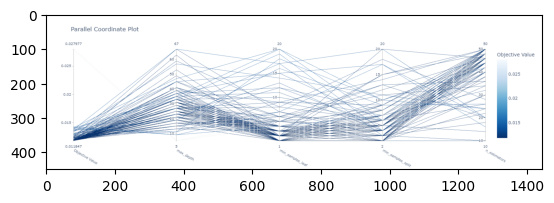

In [92]:
fig = mpimg.imread('Parallel_plot.png')
imgplot = plt.imshow(fig)

In [28]:
# Plot contour plot
fig_contour = vis.plot_contour(study, params=["min_samples_leaf", "max_depth"])
fig_contour

In [11]:
# Plot parallel_coordinate
vis.plot_parallel_coordinate(study)

In [29]:
study.best_params

{'n_estimators': 50,
 'max_depth': 65,
 'min_samples_split': 5,
 'min_samples_leaf': 2}

In [30]:
best_model = RandomForestRegressor(n_estimators= 50,
 max_depth= 65,
 min_samples_split= 5,
 min_samples_leaf=2)

In [31]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=65, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50)

In [32]:
y_pred = best_model.predict(X_test)

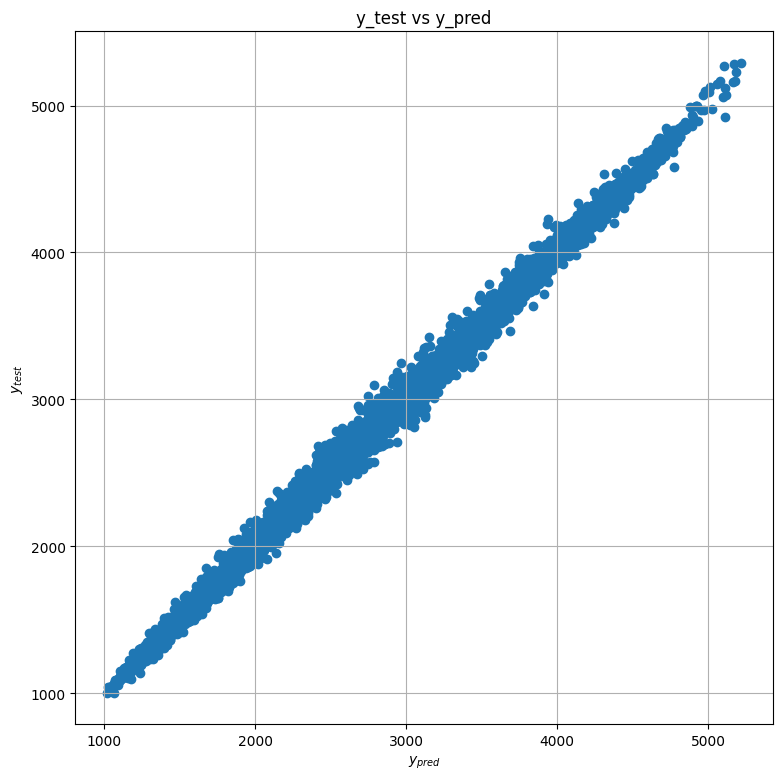

In [42]:
fig_1,ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.scatter(y_pred, y_test)
ax.set_ylabel(r'$y_{test}$')
ax.set_xlabel(r'$y_{pred}$')
plt.title('y_test vs y_pred')
plt.show()

In [66]:
mlflow.log_figure(fig_1, artifact_file="y_pred_y_test.png")

In [35]:
error = np.abs(y_test - y_pred)

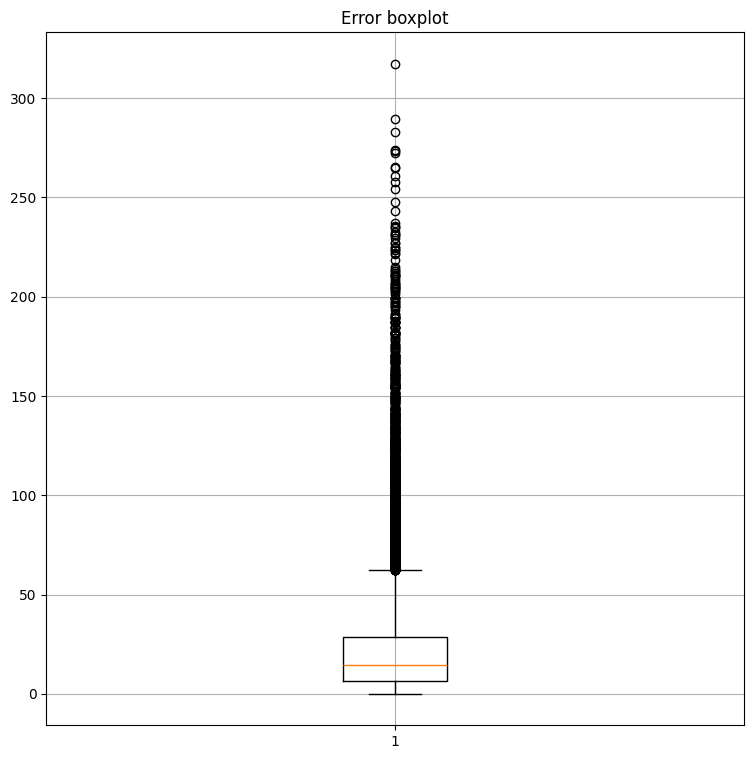

In [83]:
fig_2,ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.boxplot(error)
plt.title('Error boxplot')
plt.show()

In [84]:
mlflow.log_figure(fig_2, artifact_file="Error_boxplot.png")

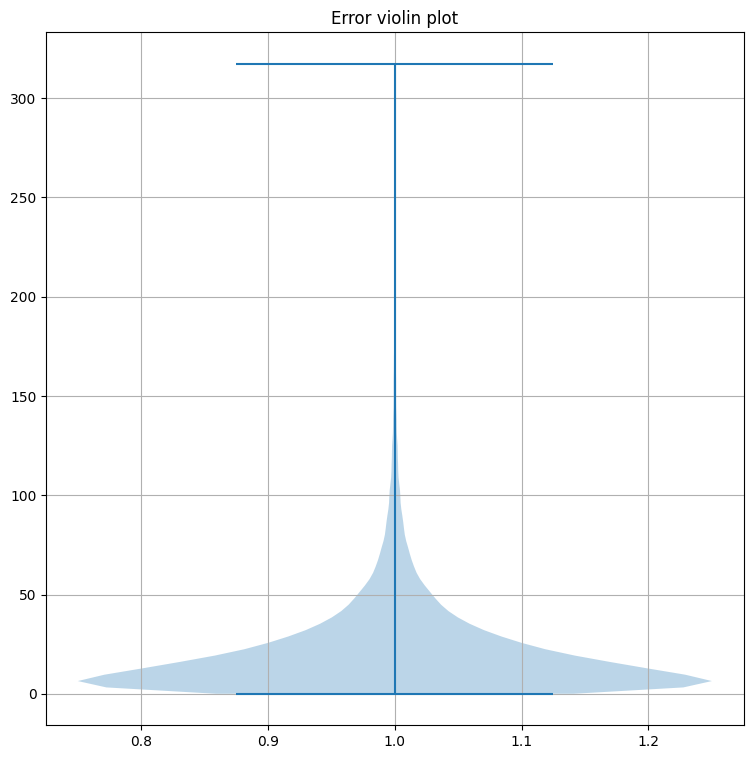

In [88]:
fig_3,ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.violinplot(error)
plt.title('Error violin plot')
plt.show()

In [95]:
mlflow.log_figure(fig_3, artifact_file="Error_violinplot.png")

In [90]:
print(f'El error máximo fué {np.max(error)}')
print(f'El error mínimo fué {np.min(error)}')
print(f'El error promedio fué {np.mean(error)}')
print(f'La desviación estándar del error fue {np.std(error)}')

El error máximo fué 317.3618174603175
El error mínimo fué 0.00023015873011900112
El error promedio fué 22.548940072500784
La desviación estándar del error fue 26.28278295733755


In [91]:
mean_absolute_percentage_error(y_pred, y_test)

0.00939989292825743

In [94]:
mlflow.end_run()